In [ ]:
import os
from fastcore.all import *
from fastai.vision.all import *

# Data Acquisition

In [6]:
# Set relative path where GTZAN mel-spectrograms are stored
path = Path("../dev/spec")

# Check that files are intact
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

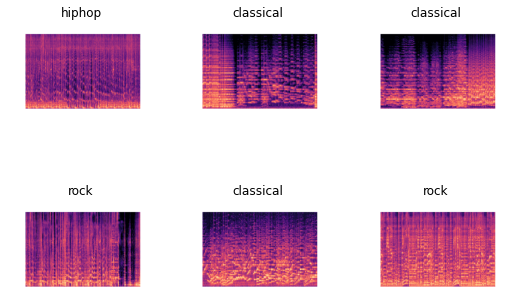

In [9]:
# Create datablock
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42069),
    get_y=parent_label
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

# Model Training

In [12]:
# Learn using Resnet18
learn = vision_learner(dls, resnet18, metrics=error_rate)

SuggestedLRs(valley=0.0012022644514217973)

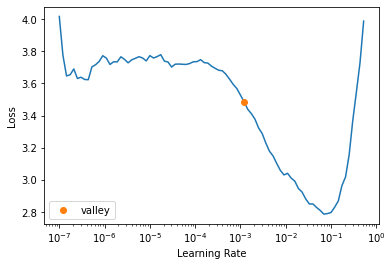

In [14]:
# Estimate learning rate to be used for training
learn.lr_find()

In [15]:
# Train model
learn.fine_tune(1, base_lr=1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,3.044712,1.550254,0.505000,01:46


epoch,train_loss,valid_loss,error_rate,time
0,1.612890,1.248956,0.385000,02:28


SuggestedLRs(valley=0.0005754399462603033)

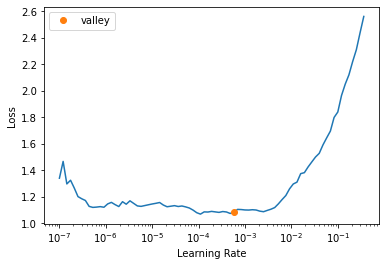

In [16]:
# Estimate new learning rate on trained model
learn.lr_find()

In [17]:
# Use new learning rate and fit one cycle training method
learn.fit_one_cycle(1, lr_max=8e-7)

epoch,train_loss,valid_loss,error_rate,time
0,1.153510,1.261354,0.375000,02:20


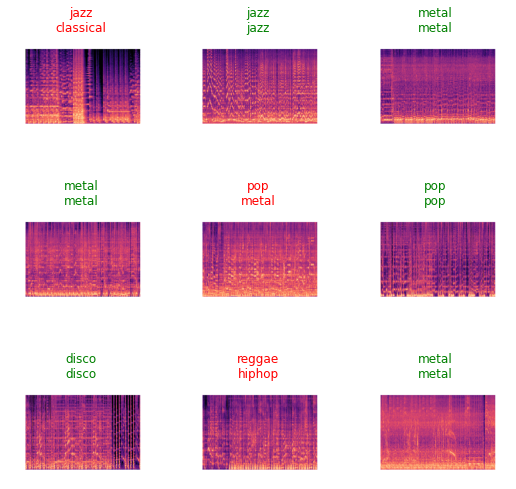

In [19]:
# See how the model performs
learn.show_results()